In [190]:
# 데이터 다운로드
from tensorflow.keras.datasets.mnist import load_data

In [191]:
(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.pnz')

In [192]:
# 데이터 형태확인
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)
set(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

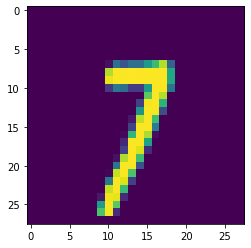

In [193]:
# 데이터 시각화를 통한 레이블 확인
import matplotlib.pyplot as plt
import numpy as np

sample_size = 1
random_idx = np.random.randint(60000, size = sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)

In [194]:
# 훈련, 검증데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 777)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


In [195]:
# 훈련 데이터 및 검증 데이터 조건에 맞게 변경(48000 -> 40000, 12000 -> 10000)
x_train = x_train[:40000]
x_val = x_val[:10000]
y_train = y_train[:40000]
y_val = y_val[:10000]

In [196]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(40000, 28, 28) (10000, 28, 28)
(40000,) (10000,)


In [197]:
# 데이터 전처리
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') 
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32') 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [198]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 28, 28, 1) (10000, 28, 28, 1) (10000, 28, 28, 1)
(40000, 10) (10000, 10) (10000, 10)


In [199]:
# CNN(Convolution Neural Network)
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop

input_shape = (28, 28, 1)
num_classes = 10
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy,optimizer = RMSprop(), metrics = ['accuracy'])

In [200]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.1795 - accuracy: 0.9465 - val_loss: 0.0633 - val_accuracy: 0.9821
Epoch 2/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.0621 - val_accuracy: 0.9832
Epoch 3/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.0650 - accuracy: 0.9814 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 4/10
1250/1250 [==============================] - 83s 66ms/step - loss: 0.0599 - accuracy: 0.9830 - val_loss: 0.0511 - val_accuracy: 0.9858
Epoch 5/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.0604 - accuracy: 0.9830 - val_loss: 0.0475 - val_accuracy: 0.9875
Epoch 6/10
1250/1250 [==============================] - 81s 65ms/step - loss: 0.0610 - accuracy: 0.9834 - val_loss: 0.0600 - val_accuracy: 0.9847
Epoch 7/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.0602 - accuracy: 0.9837 - val_loss: 0.0634 -

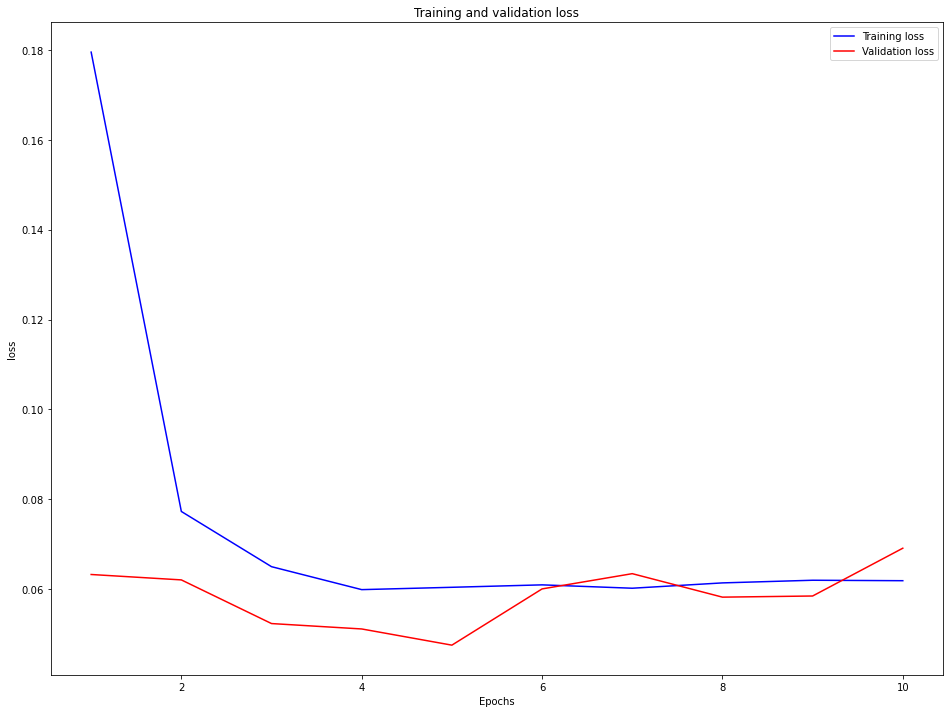

<Figure size 432x288 with 0 Axes>

In [201]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = (16, 12))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

In [202]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

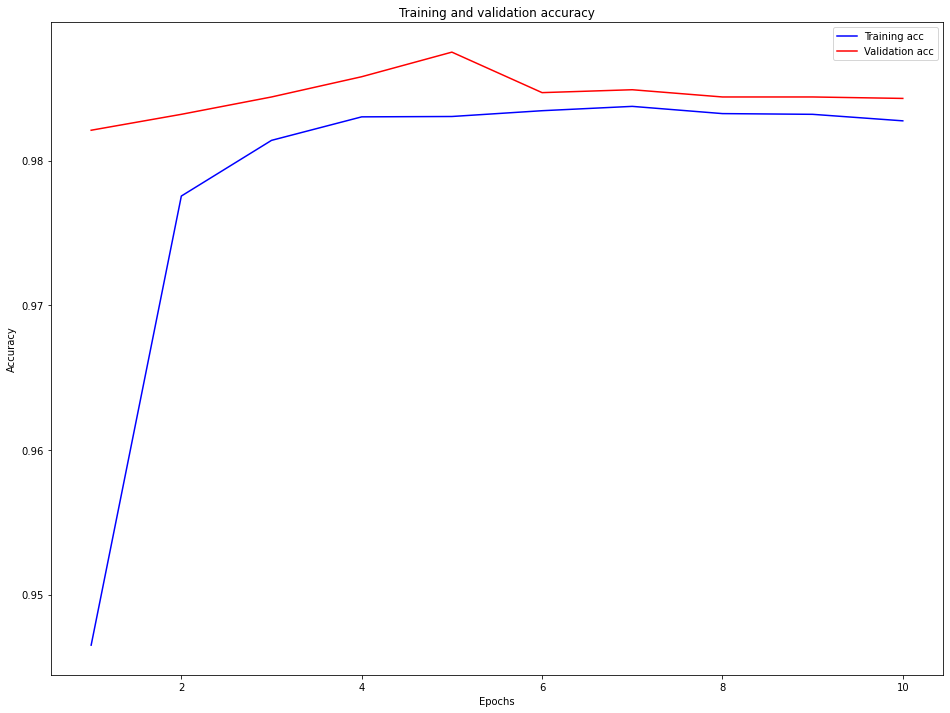

In [203]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize = (16, 12))
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [204]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy,optimizer = RMSprop(), metrics = ['accuracy'])

In [205]:
model.fit(x_train, y_train, epochs = 5, validation_data = (x_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.1746 - accuracy: 0.9475 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 2/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.0787 - accuracy: 0.9776 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 3/5
1250/1250 [==============================] - 80s 64ms/step - loss: 0.0655 - accuracy: 0.9810 - val_loss: 0.0751 - val_accuracy: 0.9807
Epoch 4/5
1250/1250 [==============================] - 79s 63ms/step - loss: 0.0624 - accuracy: 0.9822 - val_loss: 0.0554 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 [==============================] - 80s 64ms/step - loss: 0.0607 - accuracy: 0.9834 - val_loss: 0.0488 - val_accuracy: 0.9862


In [206]:
model.evaluate(x_test, y_test, verbose = 0)

[0.03991322964429855, 0.9871000051498413]